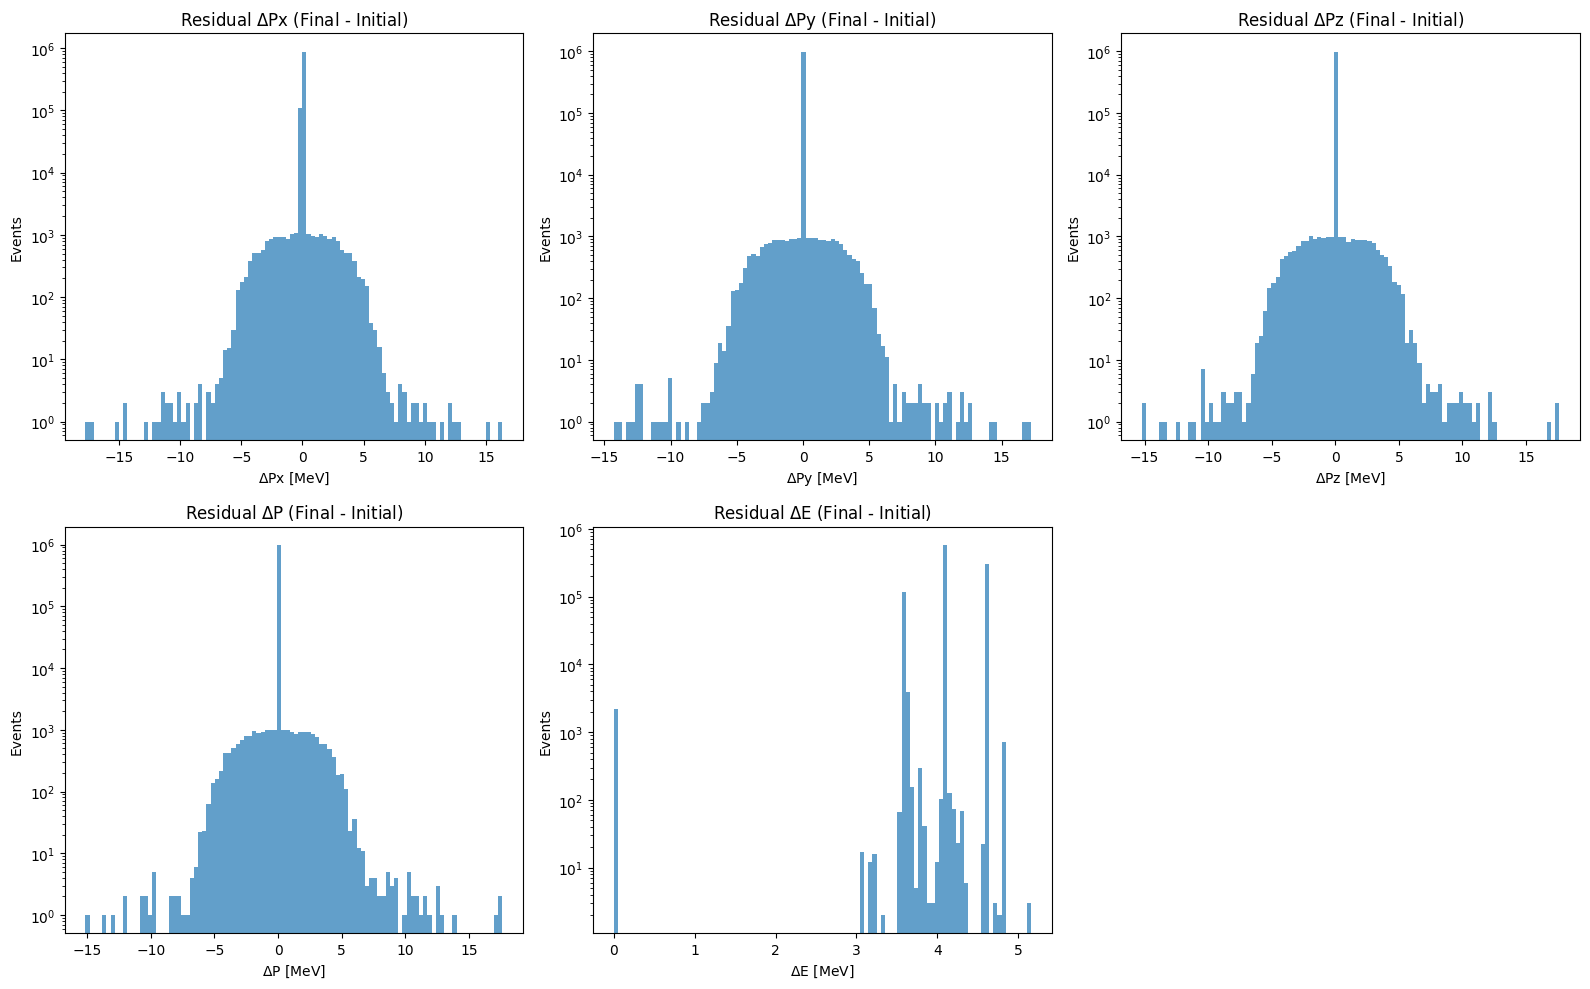

In [4]:
import numpy as np
import awkward as ak
import uproot as up
import matplotlib.pyplot as plt

# ----------------------------
# USER INPUT
# ----------------------------
FILE_PATH = "newton.root" 
EVENT_TREE = "eventTree"
THRESHOLD = 15.4  # MeV (The energy required for the reaction)

with up.open(FILE_PATH) as f:
  tree = f[EVENT_TREE]
  # Load all kinematic branches from pyNEWTON.py
  d = tree.arrays([
      "Enu", "Ex",
      "inParticlePx", "inParticlePy", "inParticlePz", "inParticleKE", "inParticleMass",
      "outParticlePx", "outParticlePy", "outParticlePz", "outParticleKE", "outParticleMass"
  ], library="ak")

  # --- 1. INITIAL STATE (Neutrino + Target Nucleons) ---
  # Neutrino is assumed to be on the Z-axis: (0, 0, Enu)
  # Target nucleons may have Fermi motion (inParticlePx/y/z)
  px_in = ak.sum(d["inParticlePx"], axis=1)
  py_in = ak.sum(d["inParticlePy"], axis=1)
  pz_in = ak.sum(d["inParticlePz"], axis=1)
  p_in_mag = np.sqrt(px_in**2 + py_in**2 + pz_in**2)
  KE_in = ak.sum(d["inParticleKE"],axis=1)
  M_in = ak.sum(d["inParticleMass"],axis=1)

  px_out = ak.sum(d["outParticlePx"], axis=1)
  py_out = ak.sum(d["outParticlePy"], axis=1)
  pz_out = ak.sum(d["outParticlePz"], axis=1)
  p_out_mag = np.sqrt(px_out**2 + py_out**2 + pz_out**2)
  KE_out = ak.sum(d["outParticleKE"],axis=1)
  M_out = ak.sum(d["outParticleMass"],axis=1)
  
  deltaPx = (px_out - px_in).to_numpy()
  deltaPy = (py_out - py_in).to_numpy()
  deltaPz = (pz_out - pz_in).to_numpy()
  deltaP = (p_out_mag - p_in_mag).to_numpy()
  deltaKE = (KE_out-KE_in).to_numpy()
  deltaM = (M_out-M_in).to_numpy()
  deltaE = deltaKE + deltaM


  # ----------------------------
  # PLOTTING
  # ----------------------------
  fig, axes = plt.subplots(2, 3, figsize=(16, 10))
  axes = axes.flatten()
  deltas = [deltaPx,deltaPy,deltaPz,deltaP,deltaE]
  labels = ["$\Delta$Px","$\Delta$Py","$\Delta$Pz","$\Delta$P","$\Delta$E"]

  for i,delta in enumerate(deltas):
    # Histogram with log scale to highlight precision or logic errors
    axes[i].hist(delta, bins=100, alpha=0.7)
    axes[i].set_title(f"Residual {labels[i]} (Final - Initial)")
    axes[i].set_xlabel(f"{labels[i]} [MeV]")
    axes[i].set_ylabel("Events")
    axes[i].set_yscale('log')

# Remove empty subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()
